<h1><center>NoShow Project</h1>
<h4>TCSS 555<br>
Spring 2018<br>
Thuan Lam, Tood Robbins, Inno Estrera</h4></center>


<h2>Libraries</h2>

In [2]:
# Load libraries

from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import os
from dateutil.parser import parse
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

## User Difined Functions

In [3]:
# user-defined functions

def get_gender_classification(gender):
    if gender == 'F':
        return 0
    elif gender == 'M':
        return 1
    else:
        return -1


def get_noshow_classification(noshow):
    if noshow == 'No':
        return 0
    elif noshow == 'Yes':
        return 1
    else:
        return -1


def get_handcap_classification(hand):
    if hand < 3:
        return 0
    else:
        return 1


def get_days(sch, app):
    a = app[0:10]
    b = parse(a)
    c = sch[0:10]
    d = parse(c)
    return b - d


def get_age_classification(age):
    if age < 4:
        return 1
    elif age < 12:
        return 2
    elif age < 31:
        return 3
    elif age < 45:
        return 4
    elif age < 63:
        return 5
    else:
        return 6


def add_data(row):
    row.gender = get_gender_classification(row.gender)
    row.noshow = get_noshow_classification(row.noshow)
    # row.neighbourhood = get_neighbourhood_classification(row.neighbourhood)
    row.agegroup = get_age_classification(row.age)
    row.handcapgroup = get_handcap_classification(row.handcap)
    day1 = parse(row.scheduledday[0:10])
    day2 = parse(row.appointmentday[0:10])
    row.daysbefore = (day2 - day1).days
    row.appointmentdayofweek = datetime.weekday(day2)
    return row

## Load Data

In [4]:
# import os
cwd = os.getcwd()
print('Current folder is {}'.format(cwd))

Current folder is C:\Users\toddr\Desktop\No-Show-Prediction


In [5]:
# Load dataset
data = pd.read_csv("Data\KaggleV2-May-2016.csv")
data = shuffle(data)
# data = data[:7000]  #get first 5000 rows

# Lower case all column header
data.columns = [x.lower() for x in data.columns]

# Rename several DataFrame columns
data = data.rename(columns = {
    'sms_received' : 'smsreceived',
    'no-show':'noshow',
})

# Dimensions of dataset
print('Dataset: {} rows and {} columns'.format(data.shape[0], data.shape[1]))

Dataset: 110527 rows and 14 columns


## Preprocess Data
* <h3>Add Columns

In [6]:
# shape
print('Dataset''s shape: {}'.format(data.shape))

# add 3 columns those will hold the classification results
data.insert(5, 'daysbefore', 0) #how many days from scheduled day to appointment day
data.insert(5, 'appointmentdayofweek', 0)  #what is the day of week of the appointment day
data.insert(8, 'agegroup', 0)
data.insert(10, 'neighbourhoodgroup', 0)
data.insert(16, 'handcapgroup', 0)

# head
print(data.head(2))

# descriptions
# print(data.describe())

Datasets shape: (110527, 14)
          patientid  appointmentid gender          scheduledday  \
91480  4.312537e+13        5681691      F  2016-05-10T14:57:51Z   
93975  3.667254e+11        5732504      F  2016-05-24T11:38:02Z   

             appointmentday  appointmentdayofweek  daysbefore  age  agegroup  \
91480  2016-06-07T00:00:00Z                     0           0   21         0   
93975  2016-06-07T00:00:00Z                     0           0    0         0   

      neighbourhood  neighbourhoodgroup  scholarship  hipertension  diabetes  \
91480   JUCUTUQUARA                   0            0             0         0   
93975     CONQUISTA                   0            0             0         0   

       alcoholism  handcap  handcapgroup  smsreceived noshow  
91480           0        0             0            1     No  
93975           0        0             0            1     No  


* <h3>Apply user-defined function

In [ ]:
data = data.apply(lambda row: add_data(row), axis=1)

# keep rows those have 'daysbefore' >= 0, otherwise, delete
data = data.loc[data['daysbefore'] >= 0]
# keep rows those have 'age' >= 0, delete if age < 0
data = data.loc[data['age'] >= 0]

In [ ]:
print(data.head(2))

In [ ]:
# data.groupby(['daysbefore']).size().reset_index(name='daysbefore_counts')

In [ ]:
# n_groups = 1
# row_0 = g[g['gender'] == 0]['gender_percent']
# row_1 = g[g['gender'] == 1]['gender_percent']
# print(row_1)
# # create plot
# fig, ax = plt.subplots()
# index = np.arange(n_groups)
# bar_width = 1
# opacity = 0.8
 
# rects1 = plt.bar(0, row_0, bar_width,
#                  alpha=opacity,
#                  color='g',
#                  label='Female')
# rects2 = plt.bar(index + bar_width, row_1, bar_width,
#                  alpha=opacity,
#                  color='b',
#                  label='Male')
 
# plt.xlabel('Gender')
# plt.ylabel('%')
# plt.title('No-Show Percentage')
# # plt.xticks(index + bar_width, ('Gender'))
# plt.legend()
 
# plt.tight_layout()
# plt.show()

In [ ]:
## Data Analysis

In [ ]:
noshow_only = data[data['noshow']==1]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,15))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
fig.set_size_inches(20, 10)
plt.subplots_adjust(wspace=1, hspace=1)

# Gender
g = noshow_only.groupby(['gender']).size().reset_index(name='gender_noshow_counts')
g['gender_counts'] = data.groupby(['gender']).size().reset_index(name='gender_counts')['gender_counts']
g['gender_percent'] = g.apply(lambda row: row.gender_noshow_counts / row.gender_counts * 100, axis=1)
g = g.drop(columns=['gender_noshow_counts','gender_counts'])
g.iloc[0, g.columns.get_loc('gender')] = 'Female'
g.iloc[1, g.columns.get_loc('gender')] = 'Male'
g = g.set_index('gender')
g.plot.bar(subplots=True, legend=None, ax=axes[0,0], rot=0, fontsize=12)

# Scholarship
s = noshow_only.groupby(['scholarship']).size().reset_index(name='scholarship_noshow_counts')
s['scholarship_counts'] = data.groupby(['scholarship']).size().reset_index(name='scholarship_counts')['scholarship_counts']
s['scholarship_percent'] = s.apply(lambda row: row.scholarship_noshow_counts / row.scholarship_counts * 100, axis=1)
s = s.drop(columns=['scholarship_noshow_counts','scholarship_counts'])
s.iloc[0, s.columns.get_loc('scholarship')] = 'No'
s.iloc[1, s.columns.get_loc('scholarship')] = 'Yes'
s = s.set_index('scholarship')
s.plot.bar(subplots=True, legend=None, ax=axes[0,1], rot=0, figsize=(15,10), fontsize=12)

# Hipertension  
h = noshow_only.groupby(['hipertension']).size().reset_index(name='hipertension_noshow_counts')
h['hipertension_counts'] = data.groupby(['hipertension']).size().reset_index(name='hipertension_counts')['hipertension_counts']
h['hipertension_percent'] = h.apply(lambda row: row.hipertension_noshow_counts / row.hipertension_counts * 100, axis=1)
h = h.drop(columns=['hipertension_noshow_counts','hipertension_counts'])
h.iloc[0, h.columns.get_loc('hipertension')] = 'No'
h.iloc[1, h.columns.get_loc('hipertension')] = 'Yes'
h = h.set_index('hipertension')
h.plot.bar(subplots=True, legend=None, ax=axes[0,2], rot=0, figsize=(15,10), fontsize=12)

# Diabetes
d = noshow_only.groupby(['diabetes']).size().reset_index(name='diabetes_noshow_counts')
d['diabetes_counts'] = data.groupby(['diabetes']).size().reset_index(name='diabetes_counts')['diabetes_counts']
d['diabetes_percent'] = d.apply(lambda row: row.diabetes_noshow_counts / row.diabetes_counts * 100, axis=1)
d = d.drop(columns=['diabetes_noshow_counts','diabetes_counts'])
d.iloc[0, d.columns.get_loc('diabetes')] = 'No'
d.iloc[1, d.columns.get_loc('diabetes')] = 'Yes'
d = d.set_index('diabetes')
d.plot.bar(subplots=True, legend=None, ax=axes[0,3], rot=0, figsize=(15,10), fontsize=12)

# Alcoholism
a = noshow_only.groupby(['alcoholism']).size().reset_index(name='alcoholism_noshow_counts')
a['alcoholism_counts'] = data.groupby(['alcoholism']).size().reset_index(name='alcoholism_counts')['alcoholism_counts']
a['alcoholism_percent'] = a.apply(lambda row: row.alcoholism_noshow_counts / row.alcoholism_counts * 100, axis=1)
a = a.drop(columns=['alcoholism_noshow_counts','alcoholism_counts'])
a.iloc[0, a.columns.get_loc('alcoholism')] = 'No'
a.iloc[1, a.columns.get_loc('alcoholism')] = 'Yes'
a = a.set_index('alcoholism')
a.plot.bar(subplots=True, legend=None, ax=axes[1,0], rot=0, figsize=(15,10), fontsize=12)

# Handcap
c = noshow_only.groupby(['handcap']).size().reset_index(name='handcap_noshow_counts')
c['handcap_counts'] = data.groupby(['handcap']).size().reset_index(name='handcap_counts')['handcap_counts']
c['handcap_percent'] = c.apply(lambda row: row.handcap_noshow_counts / row.handcap_counts * 100, axis=1)
c = c.drop(columns=['handcap_noshow_counts','handcap_counts'])
c = c.set_index('handcap')
c.plot.bar(subplots=True, legend=None, ax=axes[1,1], rot=0, figsize=(15,10), fontsize=12)

# Sms Received
s = noshow_only.groupby(['smsreceived']).size().reset_index(name='smsreceived_noshow_counts')
s['smsreceived_counts'] = data.groupby(['smsreceived']).size().reset_index(name='smsreceived_counts')['smsreceived_counts']
s['smsreceived_percent'] = s.apply(lambda row: row.smsreceived_noshow_counts / row.smsreceived_counts * 100, axis=1)
s = s.drop(columns=['smsreceived_noshow_counts','smsreceived_counts'])
s.iloc[0, s.columns.get_loc('smsreceived')] = 'No'
s.iloc[1, s.columns.get_loc('smsreceived')] = 'Yes'
s = s.set_index('smsreceived')
s.plot.bar(subplots=True, legend=None, ax=axes[1,2], rot=0, figsize=(15,10), fontsize=12)

# age
age1 = noshow_only.groupby(['age']).size().reset_index(name='age_noshow_counts')
age2 = data.groupby(['age']).size().reset_index(name='age_counts')
# show all records from data
age = pd.merge(age1, age2, on='age', how='right').fillna(0)
age['age_percent'] = age.apply(lambda row: row.age_noshow_counts / row.age_counts * 10000, axis=1)
age = age.drop(columns=['age_noshow_counts'])
# age = age.drop(columns=['age_noshow_counts','age_counts'])
age = age.set_index('age')
age.plot.bar(legend=True, rot=0, figsize=(15,10), fontsize=12)

# daysbefore
b1 = noshow_only.groupby(['daysbefore']).size().reset_index(name='daysbefore_noshow_counts')
b2 = data.groupby(['daysbefore']).size().reset_index(name='daysbefore_counts')
# show all records from data
b = pd.merge(b1, b2, on='daysbefore', how='right').fillna(0)
b['daysbefore_percent'] = b.apply(lambda row: row.daysbefore_noshow_counts / row.daysbefore_counts * 100, axis=1)
b = b.drop(columns=['daysbefore_noshow_counts','daysbefore_counts'])
b = b.set_index('daysbefore')
b.plot.bar(legend=True, rot=0, figsize=(15,10), fontsize=12)

# neighbourhood
n1 = noshow_only.groupby(['neighbourhood']).size().reset_index(name='neighbourhood_noshow_counts')
n2 = data.groupby(['neighbourhood']).size().reset_index(name='neighbourhood_counts')
# show all records from data
n = pd.merge(n1, n2, on='neighbourhood', how='right').fillna(0)
n['neighbourhood_percent'] = n.apply(lambda row: row.neighbourhood_noshow_counts / row.neighbourhood_counts * 1000, axis=1)
n['neighbourhood_group'] = n.apply(lambda row: row.neighbourhood_percent // 5, axis=1)
# n = n.drop(columns=['neighbourhood_noshow_counts','neighbourhood_counts']).sort_values(by=['neighbourhood_percent'])
n = n.drop(columns=['neighbourhood_counts']).sort_values(by=['neighbourhood_percent'])
n = n.set_index('neighbourhood')
n.plot.bar(legend=True, rot=0, figsize=(15,10), fontsize=12)
# print(n.head(50));
# print(data.groupby(['scholarship']).size().reset_index(name='counts'))
# print(data.groupby(['hipertension']).size().reset_index(name='counts'))
# print(data.groupby(['diabetes']).size().reset_index(name='counts'))
# print(data.groupby(['alcoholism']).size().reset_index(name='counts'))
# print(data.groupby(['handcap']).size().reset_index(name='counts'))
# print(data.groupby(['smsreceived']).size().reset_index(name='counts'))

# d1 = pd.pivot_table(data,index=['noshow'],values=['gender'],aggfunc='count')
# print(d1)

In [ ]:
nh = n.drop(columns=['neighbourhood_noshow_counts']).sort_values(by=['neighbourhood_percent'])
# print(neighbourhood.head(5))

# print(nh.head(5))
data['neighbourhoodgroup'] = data['neighbourhood'].map(lambda xx: nh.loc[xx]['neighbourhood_group'])
# print (neighbourhood.loc[neighbourhood['neighbourhood'] == ne][neighbourhood_group])

# print(data.head(150))

# xxx = nh.loc['PONTAL DE CAMBURI']['neighbourhood_group']
# print(xxx)

# get_neighbourhood_classification('PONTAL DE CAMBURI')
# neighbourhood = n.index.tolist()
# print(neighbourhood)

In [ ]:
# data = data.apply(lambda row: change_neighbourhood(row), axis=1)
# print(data.head(5))

* <h3>Drop Columns

In [ ]:
# drop columns that we have calculated and get results on new columns
for x in data.columns:
    # if not useful information drop
    if x != 'patientid' or x != 'agegroup' or x != 'daysbefore' or x != 'diabetes' or x != 'scholarship' or x != 'hipertension' or x != 'smsreceived':
        data.drop(x, axis=1, inplace=True)  # axis=1 means apply for each row
        
# drop columns that we have calculated and get results on new columns
# data.drop('appointmentid', axis=1, inplace=True) #axis=1 means apply for each row
# data.drop('appointmentday', axis=1, inplace=True)#axis=1 means apply for each row
# data.drop('scheduledday', axis=1, inplace=True) #axis=1 means apply for each row
# data.drop('appointmentdayofweek', axis=1, inplace=True) #axis=1 means apply for each row 
# data.drop('age', axis=1, inplace=True) #axis=1 means apply for each row 
# data.drop('neighbourhood', axis=1, inplace=True) #axis=1 means apply for each row 
# data.drop('handcap', axis=1, inplace=True) #axis=1 means apply for each row

# useless data
# data.drop('alcoholism', axis=1, inplace=True) #axis=1 means apply for each row
# data.drop('gender', axis=1, inplace=True) #axis=1 means apply for each row


# data.drop('patientid', axis=1, inplace=True)
# data.drop('agegroup', axis=1, inplace=True) #axis=1 means apply for each row 
# data.drop('neighbourhoodgroup', axis=1, inplace=True) #axis=1 means apply for each row 
# data.drop('daysbefore', axis=1, inplace=True) #axis=1 means apply for each row 
# data.drop('diabetes', axis=1, inplace=True) #axis=1 means apply for each row
# data.drop('scholarship', axis=1, inplace=True) #axis=1 means apply for each row
# data.drop('hipertension', axis=1, inplace=True) #axis=1 means apply for each row
# data.drop('handcapgroup', axis=1, inplace=True) #axis=1 means apply for each row
# data.drop('smsreceived', axis=1, inplace=True) #axis=1 means apply for each row

In [ ]:
# checking
print(data.head(2))
print('n = {} and p = {}'.format(data.shape[0], data.shape[1]))

## Model

In [261]:
# Split-out validation dataset (No-show column only)
col = len(data.columns) - 1
array = data.values   #numpy array
X = array[:,0:col]#numpy array - 11 first columns
Y = array[:,col]  #numpy array - the 12st column
# print(X[0:2,])  #print top 2 rows
# print(Y[0:2,])  #print top 2 rows
# print(X.size)

In [262]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# print('{}'.format(X_train, Y_train))

In [263]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# print('{}'.format(X_train, Y_train))

In [276]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.798718 (0.016456)
LDA: 0.790144 (0.012327)
KNN: 0.759247 (0.016104)
NB: 0.798718 (0.016456)
SVM: 0.798362 (0.017029)


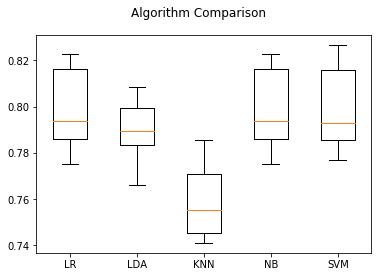

In [277]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [278]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
# lr = LogisticRegression()
# lr.fit(X_train, Y_train)
# predictions = lr.predict(X_validation)
print(predictions)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

[0. 0. 0. ... 0. 0. 0.]
0.7914285714285715
[[1108    0]
 [ 292    0]]
             precision    recall  f1-score   support

        0.0       0.79      1.00      0.88      1108
        1.0       0.00      0.00      0.00       292

avg / total       0.63      0.79      0.70      1400



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Conclusion
#### bla bla bla